<h1>
<center>Classifying and Clustering Images</center>
</h1>

<h1>
<center>Avery Lee</center>
</h1>

# Applying PCA 

Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time the training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. 

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

It seems that the PCA reduction did help since the accuracy is higher. It didn't take too much more time than no PCA either even though it trained on the entire training set. 

In [2]:
from sklearn.svm import SVC
import time
from sklearn.decomposition import PCA

# SVM Classifier, Gaussian RBF Kernel
rbf_svc = SVC(kernel='rbf')
%time rbf_svc.fit(X_train_red, y_train_red)
rbf_svc_test_accuracy = rbf_svc.score(X_test, y_test)

print(f'Test accuracy: {rbf_svc_test_accuracy}')

CPU times: user 9.62 s, sys: 123 ms, total: 9.74 s
Wall time: 10.1 s
Test accuracy: 0.9594


In [3]:
# PCA 
pca = PCA(n_components=0.6)
rbf_svc_pca = SVC(kernel='rbf')

X_train_pca = pca.fit_transform(X_train)
%time rbf_svc_pca.fit(X_train_pca, y_train)
rbf_svc_pca_test_accuracy = rbf_svc_pca.score(pca.transform(X_test), y_test)

print(f'Test accuracy: {rbf_svc_pca_test_accuracy}')

CPU times: user 20.9 s, sys: 782 ms, total: 21.7 s
Wall time: 22.2 s
Test accuracy: 0.9723


This time let's try using a random forest classifier instead of the SVM classifier and comment on the result. 

This time, PCA helped less since the accuracy isn't better than with no PCA. The time also took way longer as well.

In [4]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifer
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
%time rf.fit(X_train_red, y_train_red)
rf_test_accuracy = rf.score(X_test, y_test)

print(f'Test accuracy: {rf_test_accuracy}')

CPU times: user 5.63 s, sys: 147 ms, total: 5.78 s
Wall time: 2.17 s
Test accuracy: 0.9504


In [5]:
# PCA 
pca = PCA(n_components=0.6)
X_train_pca = pca.fit_transform(X_train)
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)
%time rf_pca.fit(X_train_pca, y_train)
rf_pca_test_accuracy = rf_pca.score(pca.transform(X_test), y_test)

print(f'Test accuracy: {rf_pca_test_accuracy}')

CPU times: user 41 s, sys: 334 ms, total: 41.3 s
Wall time: 14.3 s
Test accuracy: 0.943


# Visualizing dimensionality reduction

Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Measure how long it took to reduce the dimensionality. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. 

In [6]:
from sklearn.manifold import TSNE 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import random

# Scatter plot 
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

/Users/averylee/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/averylee/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


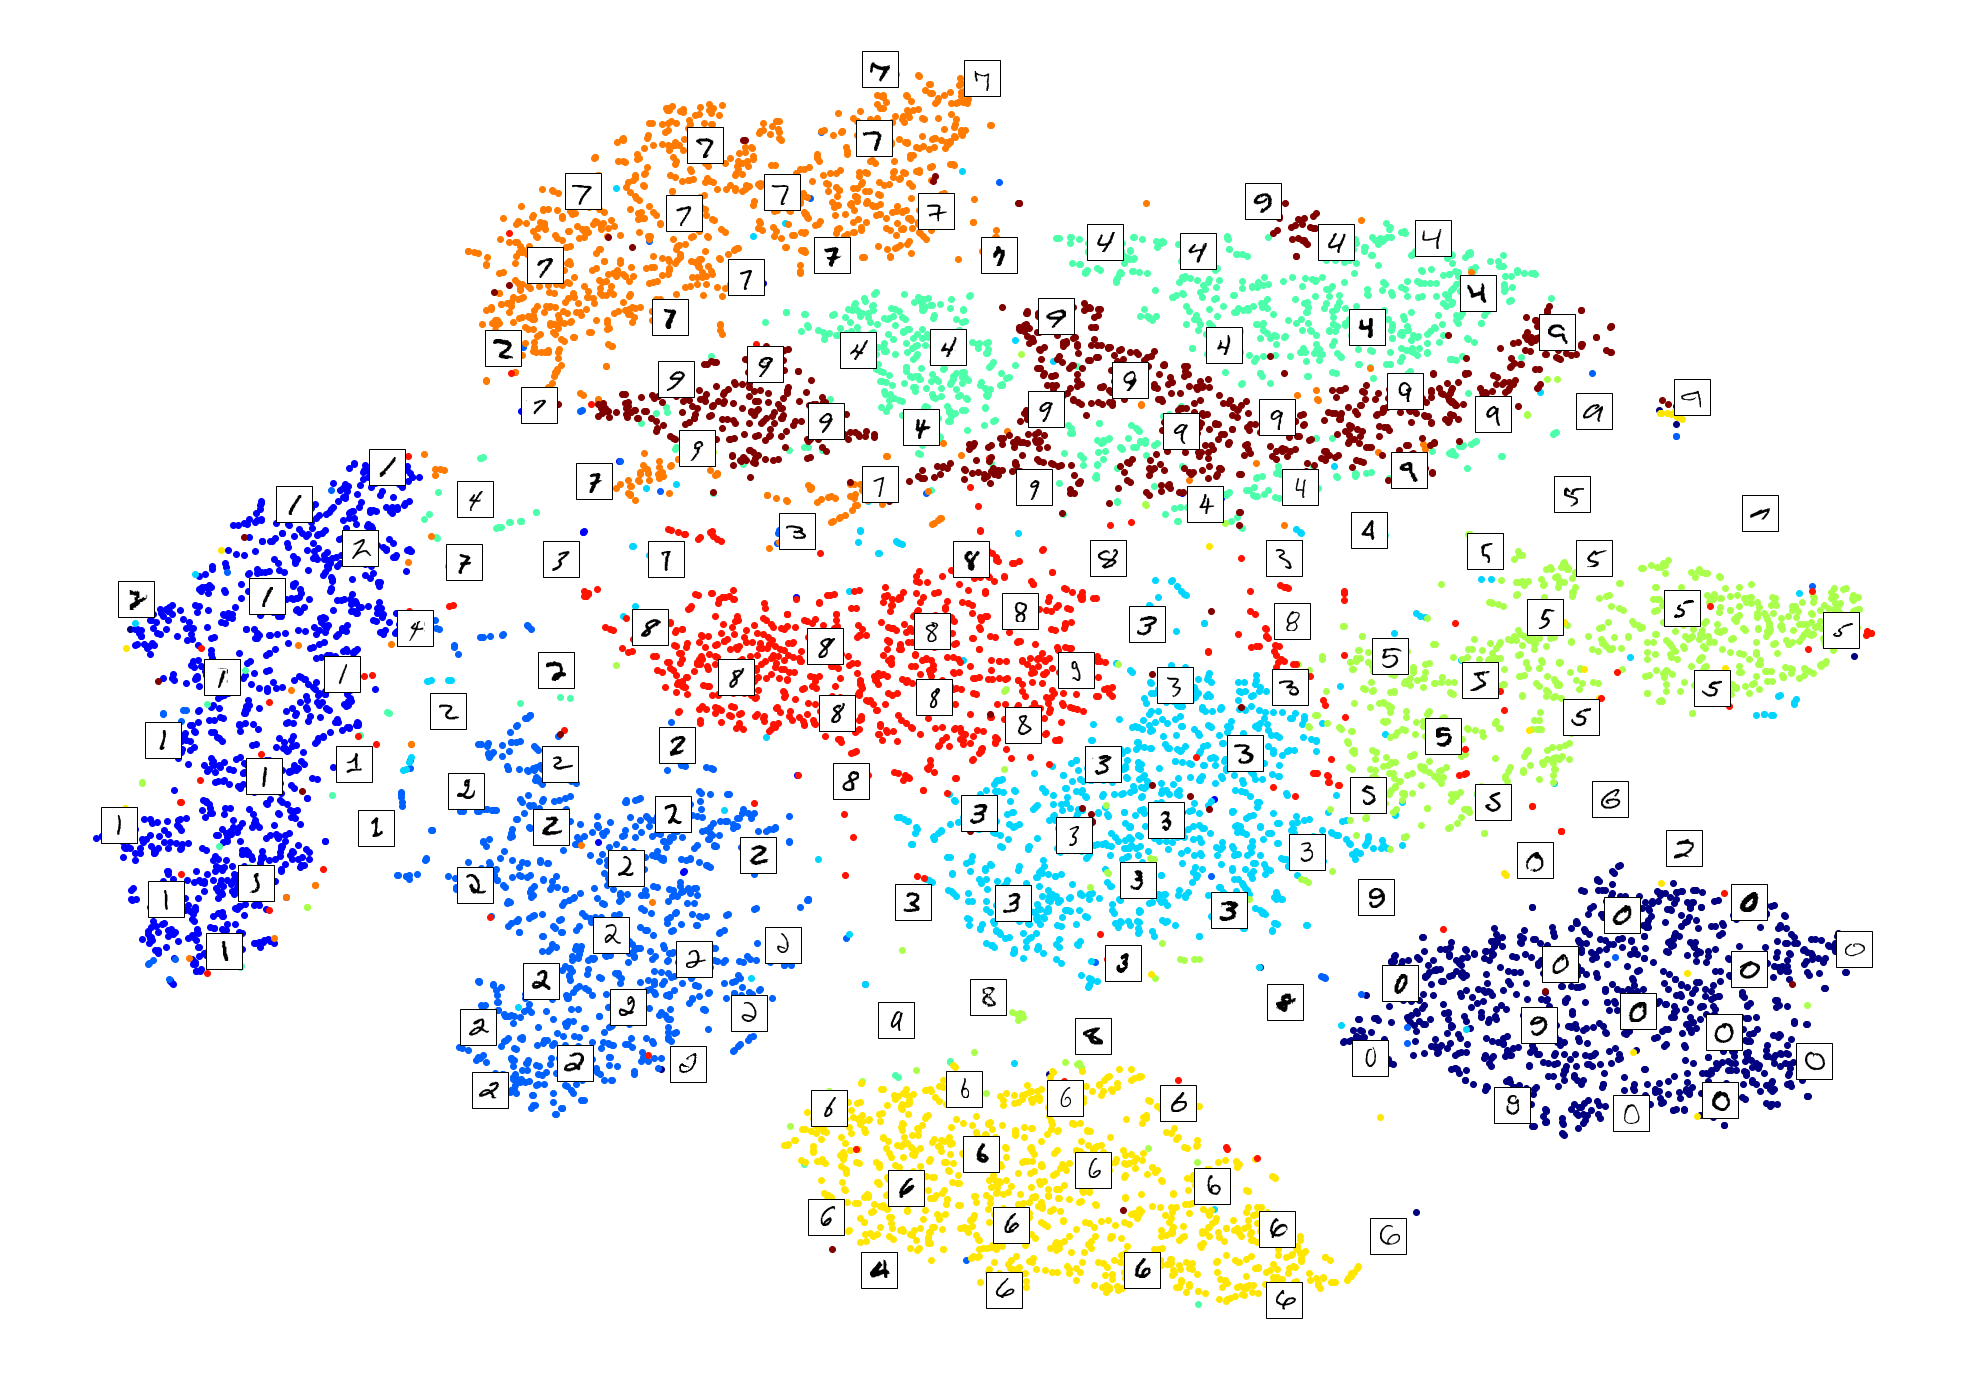

In [7]:
# TSNE
tsne = TSNE(n_components=2, random_state=42)
start = time.time()
X_tsne_reduced = tsne.fit_transform(X_train_red)
end = time.time()
tsne_time = end-start
plot_digits(X_tsne_reduced, y_train_red, images=X_train_red, figsize=(35, 25))

Now, let's try using other dimensionality reduction methods. 

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

Then for each of the three methods above, let's report how long it took to reduce the dimension. Also, provide a 2D plot of the results. 

It seems PCA takes the least time to train and the PCA+TSNE visualization seems to be the best visualization that separates the 10 target categories where the divisions of the categories are most clear.

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

# PCA
pca = PCA(n_components=2, random_state=42)
start = time.time()
X_pca_reduced = pca.fit_transform(X_train_red)
end = time.time()
pca_time = end-start

# LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
start = time.time()
X_lle_reduced = lle.fit_transform(X_train_red)
end = time.time()
lle_time = end-start

# PCA + TSNE 
pca = PCA(n_components=0.95, random_state=42)
tsne = TSNE(n_components=2, random_state=42)
X_pcatsne_reduced = pca.fit_transform(X_train_red)
start = time.time()
X_pcatsne_reduced = tsne.fit_transform(pca.fit_transform(X_train_red))
end = time.time()
pcatsne_time = end-start

print(f'TSNE: {tsne_time}, PCA: {pca_time}, LLE: {lle_time}, PCA+TSNE: {pcatsne_time}')

/Users/averylee/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/averylee/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE: 62.36956310272217, PCA: 0.49228882789611816, LLE: 16.769256830215454, PCA+TSNE: 61.12427520751953


<BarContainer object of 4 artists>

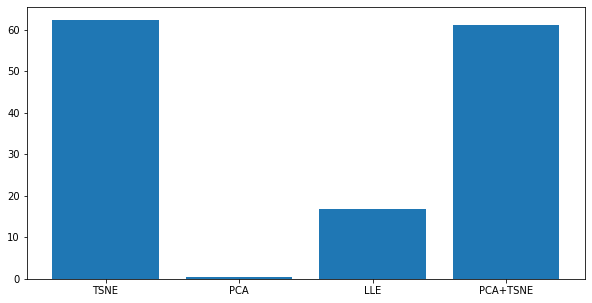

In [9]:
# Plot times 
fig = plt.figure(figsize=(10,5))
plt.bar(['TSNE', 'PCA', 'LLE', 'PCA+TSNE'], [tsne_time, pca_time, lle_time, pcatsne_time])

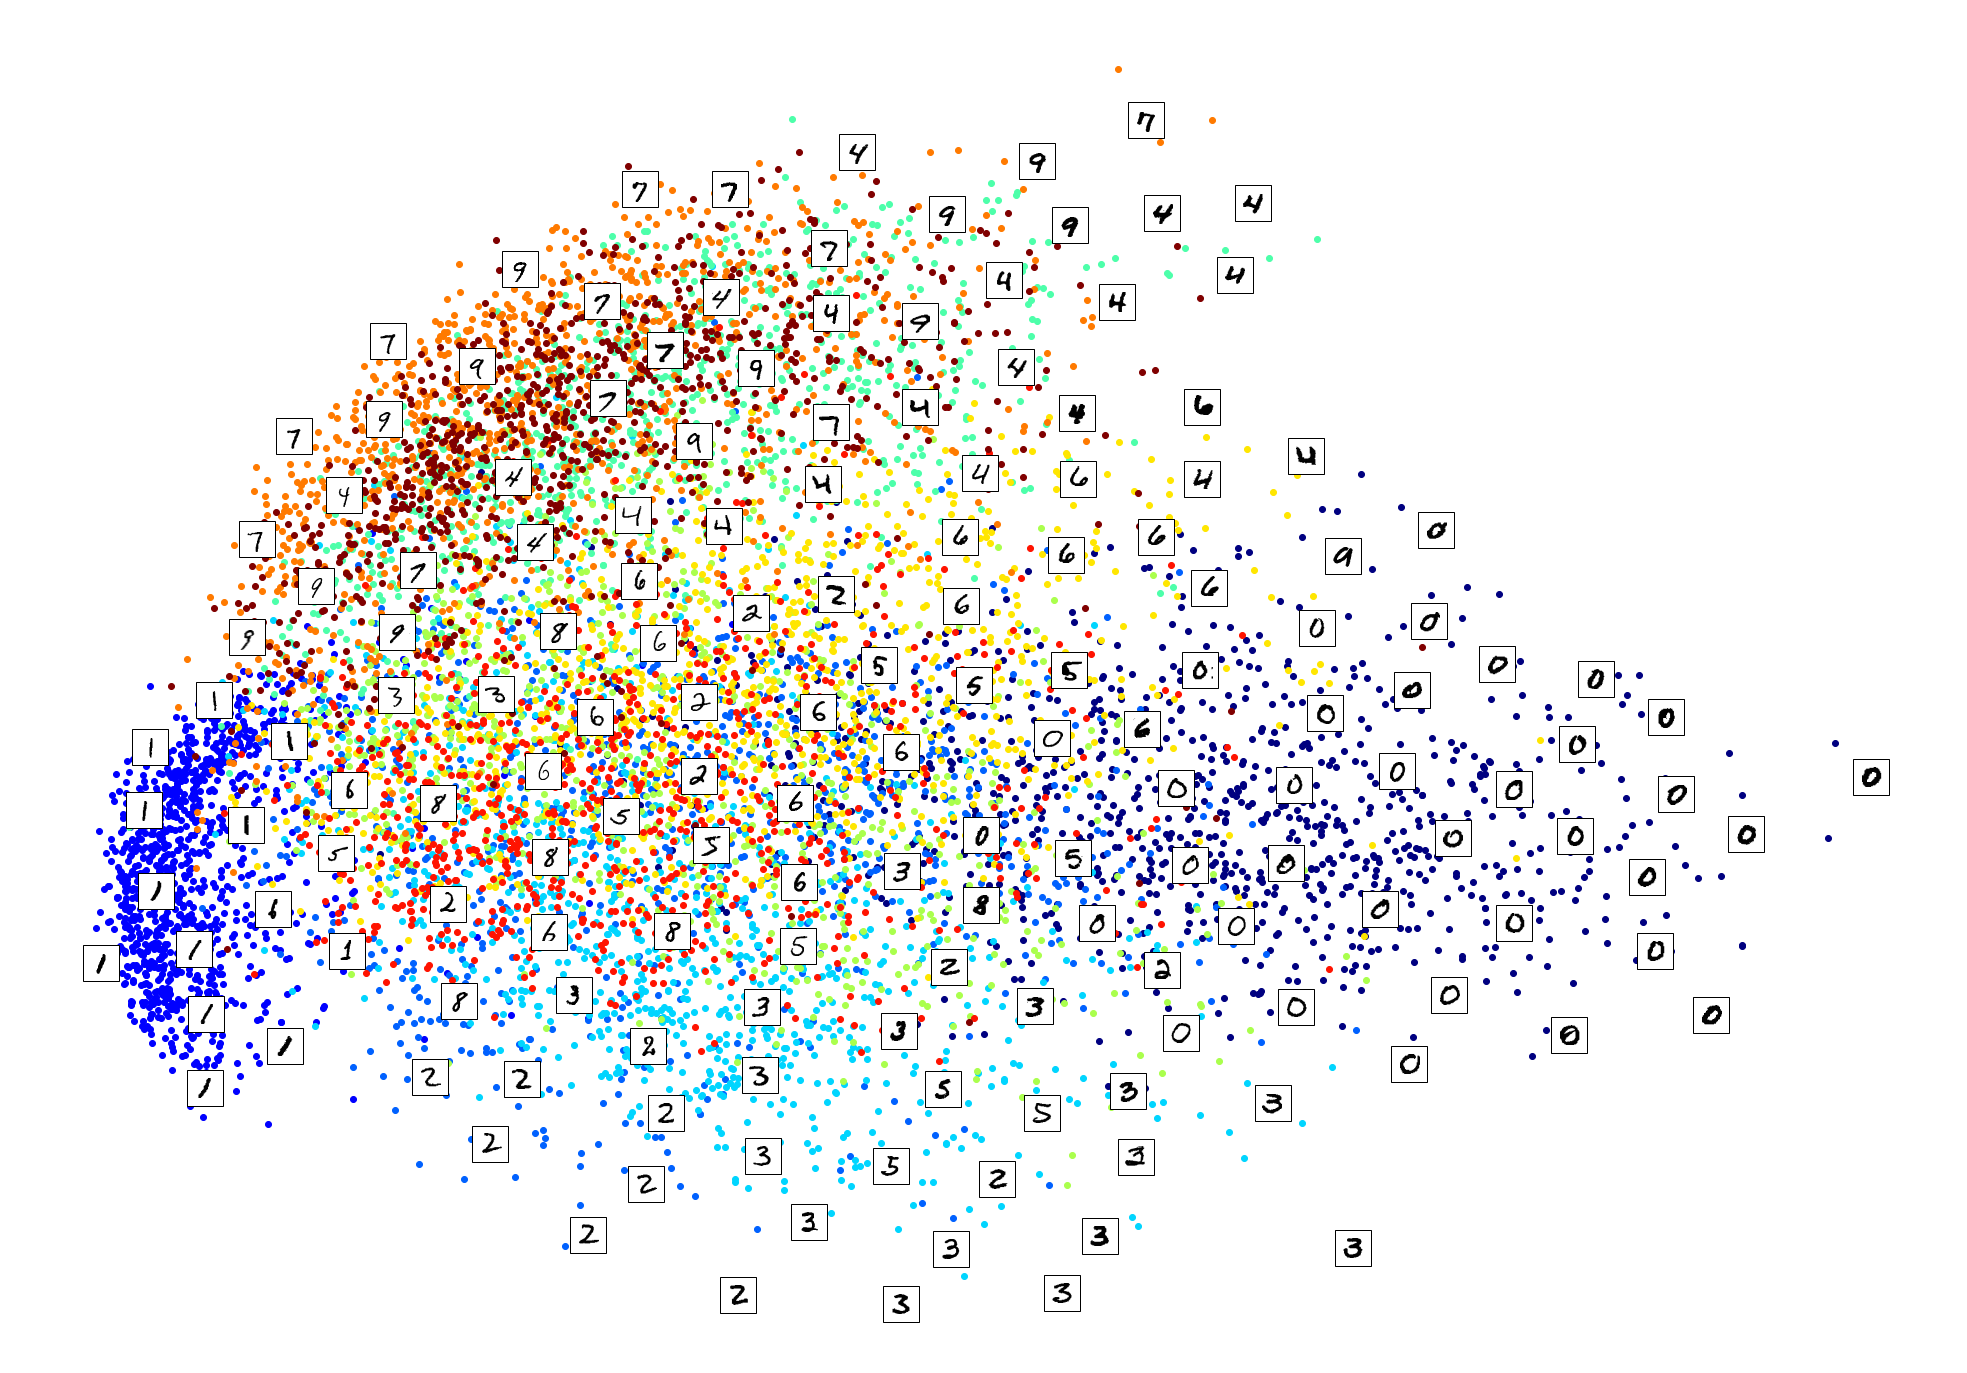

In [10]:
# Plot PCA 
plot_digits(X_pca_reduced, y_train_red, images=X_train_red, figsize=(35, 25))

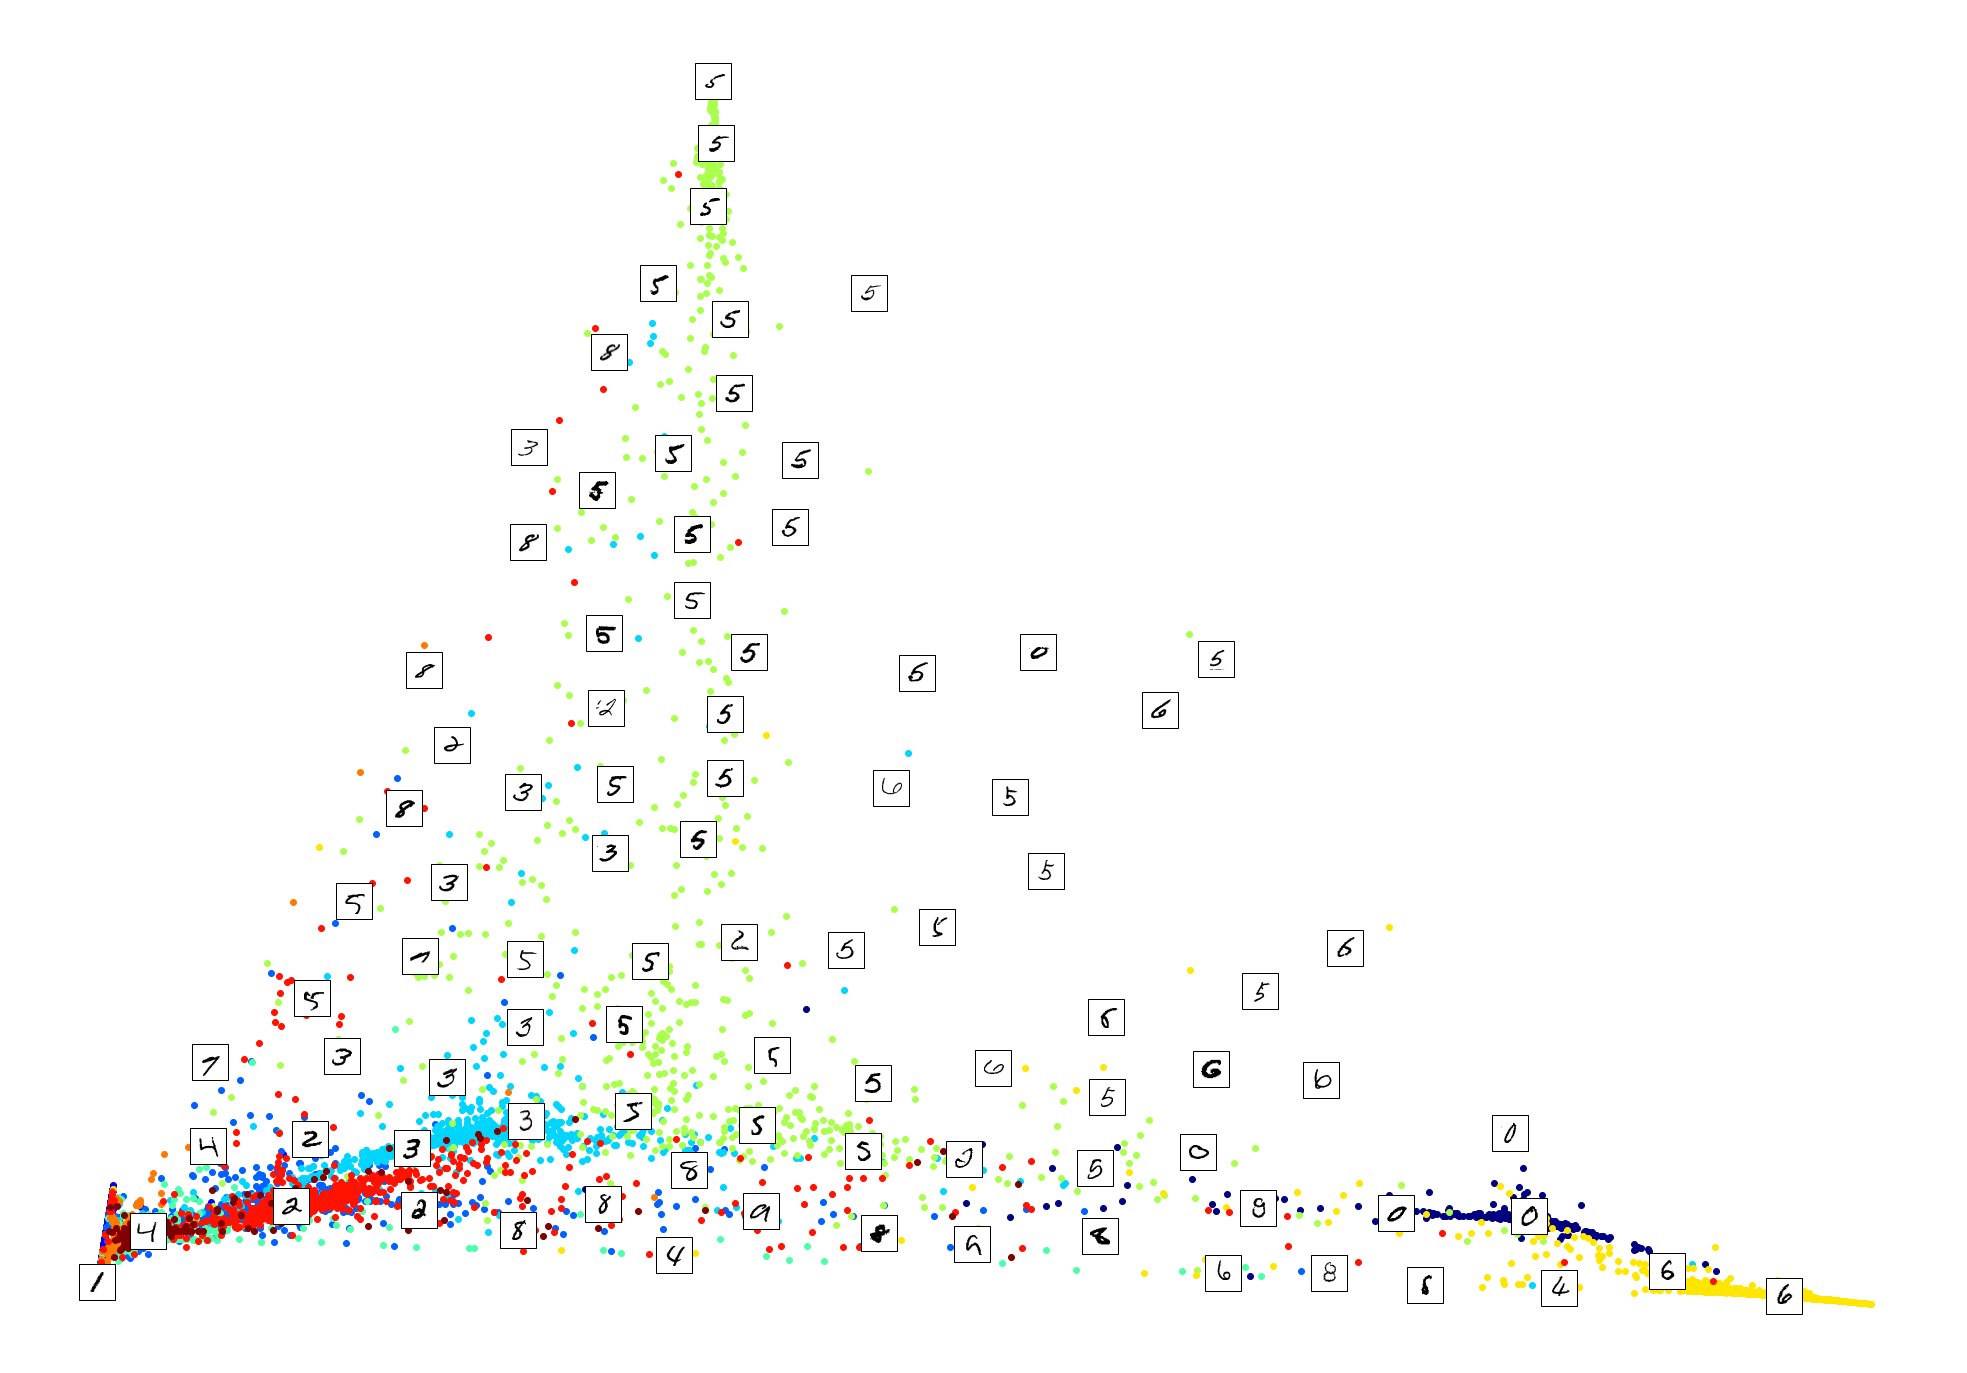

In [11]:
# Plot LLE
plot_digits(X_lle_reduced, y_train_red, images=X_train_red, figsize=(35, 25))

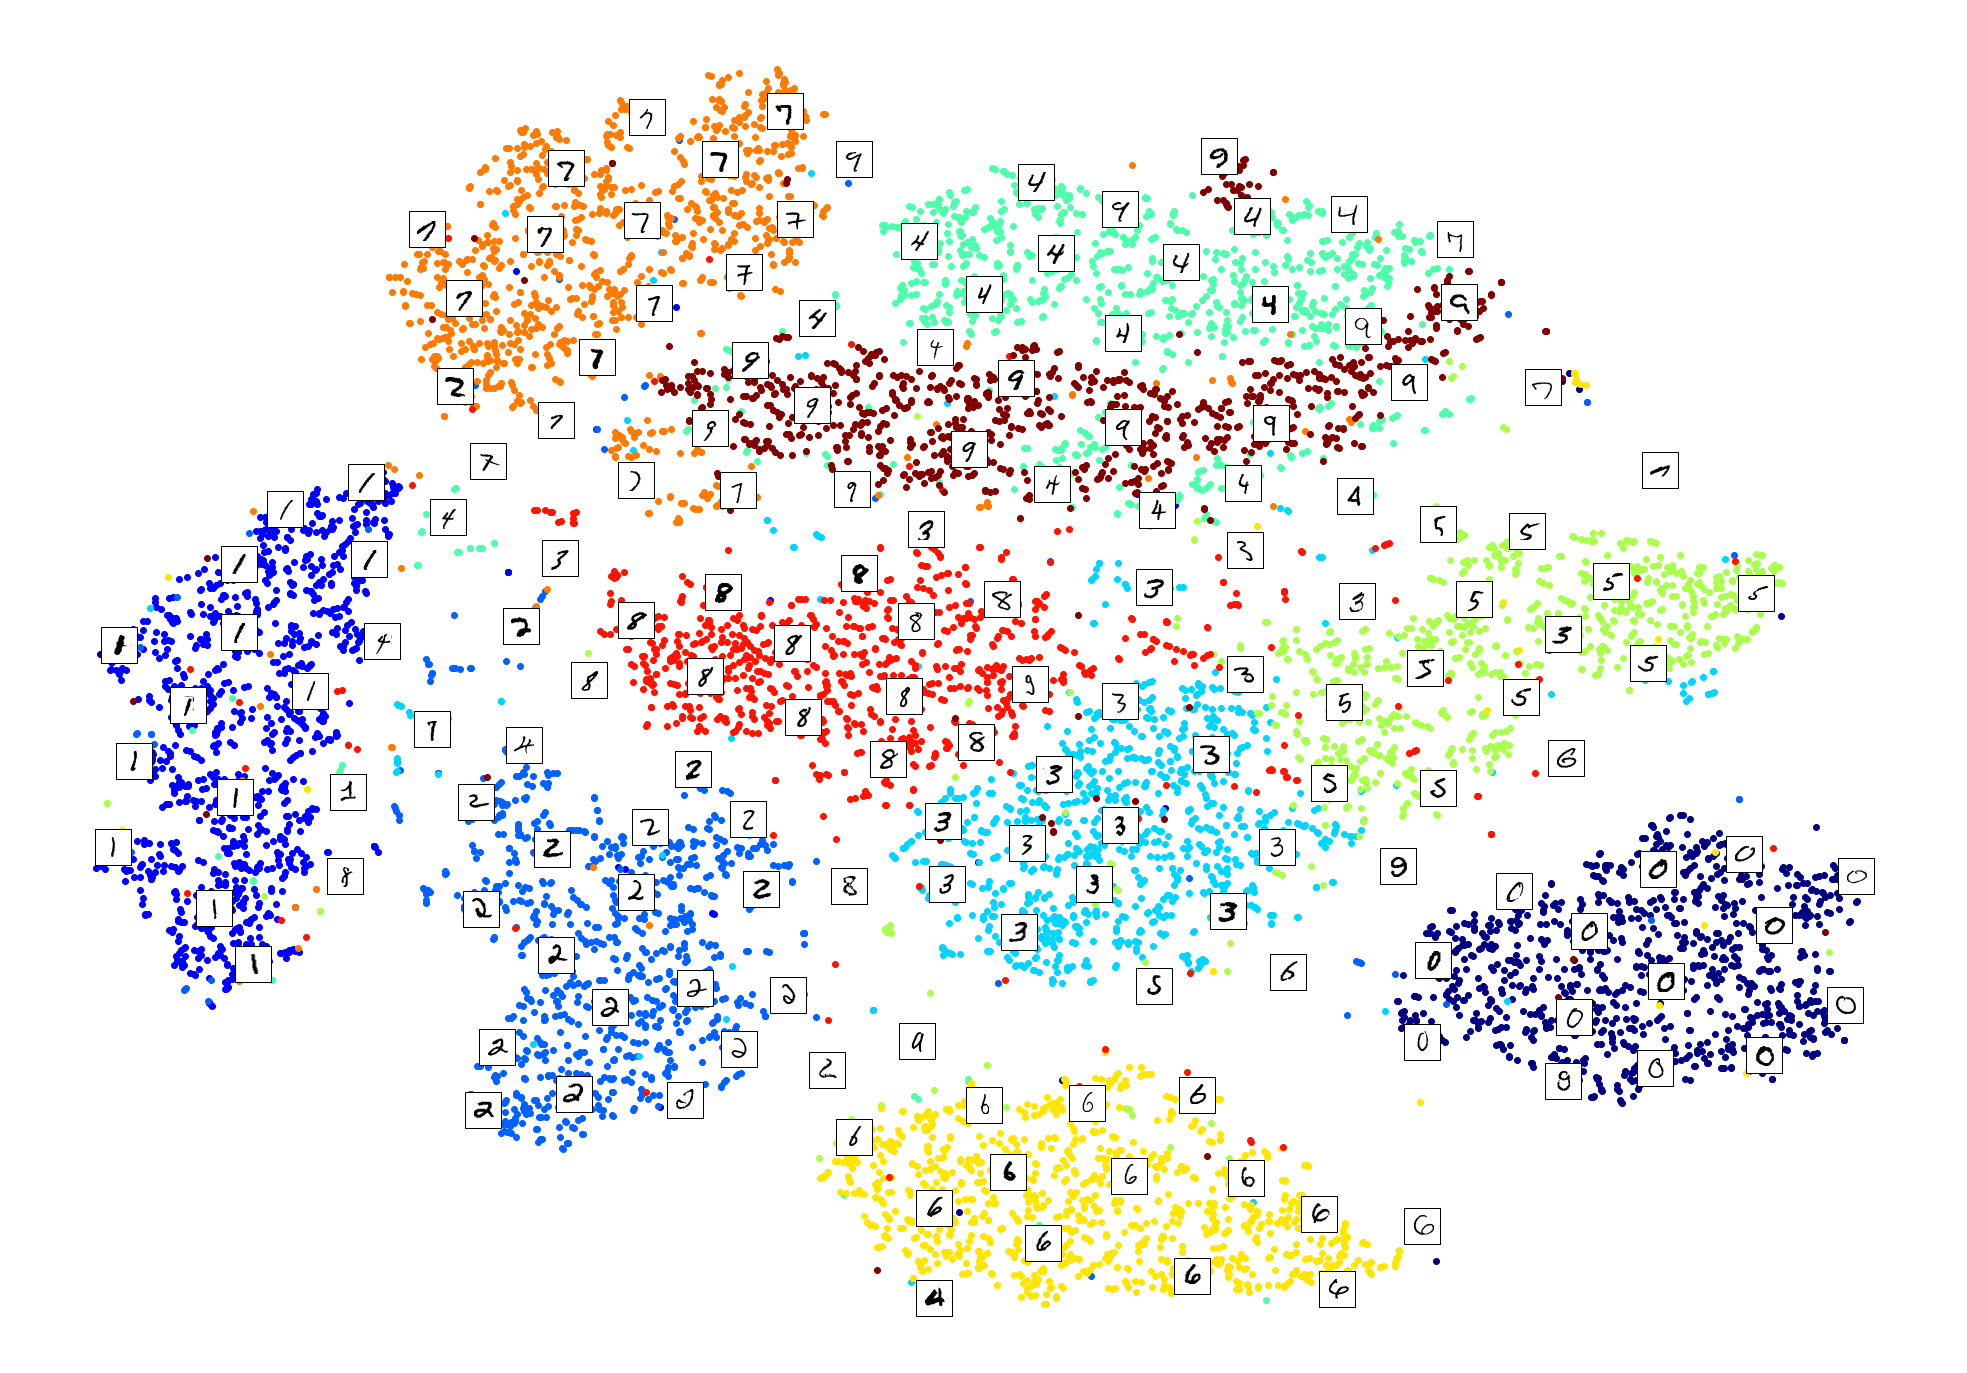

In [12]:
# Plot PCA+TSNE
plot_digits(X_pcatsne_reduced, y_train_red, images=X_train_red, figsize=(35, 25))

# k-Means clustering 

The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. 

In [13]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

Based on the silhouette scores, k=130 gives the highest score, so we can choose that. But comparing k=40 and k=130 with the silhouette diagram, it seems k=40 is better since the values are more consistent to each other. With k=130, it does seem that there are similar faces in each cluster. 

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA 
pca = PCA(n_components=0.99, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

# KMEANS 
ks = range(5, 145+1, 5)
kmc_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca) for k in ks]
inertias = [model.inertia_ for model in kmc_per_k]
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmc_per_k]

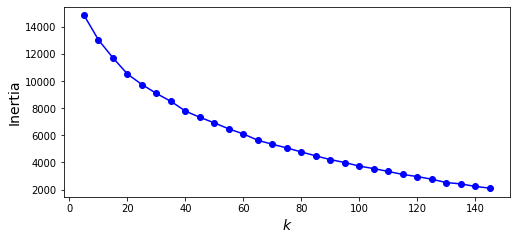

In [15]:
# Plot inertia 
plt.figure(figsize=(8, 3.5))
plt.plot(ks, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

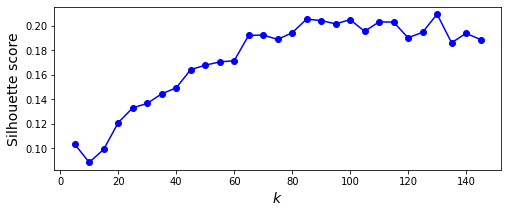

130 KMeans(n_clusters=130, random_state=42)


In [16]:
# Plot silhouette scores 
plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# Best k vs 40 clusters 
best_index = np.argmax(silhouette_scores)
best_k = ks[best_index]
best_model = kmc_per_k[best_index]
print(best_k, best_model)

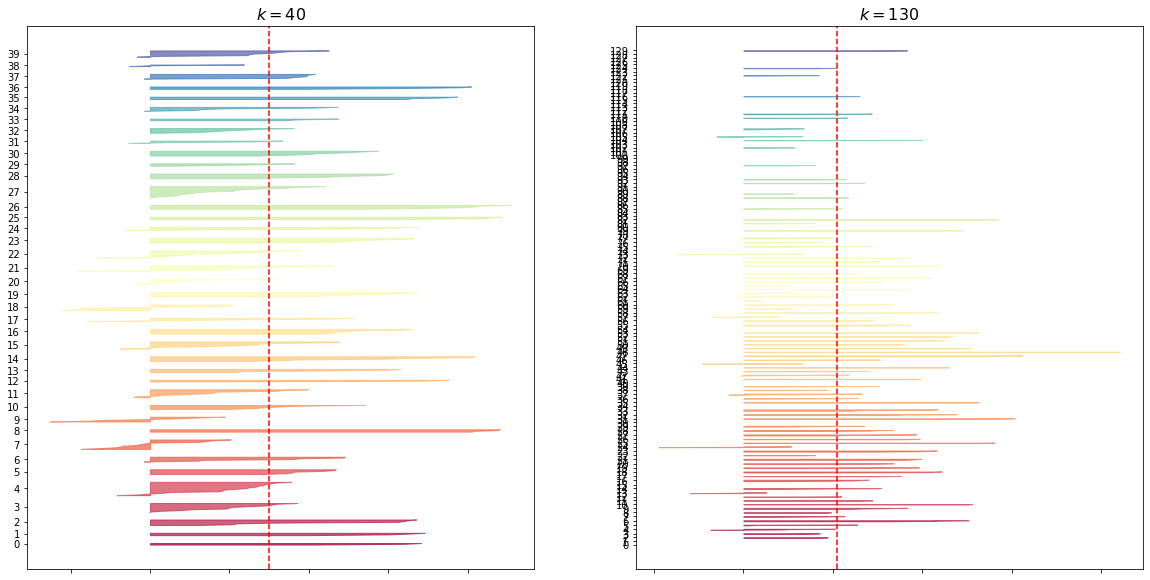

In [17]:
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_samples

# Plot silhouette diagrams 
plt.figure(figsize=(20, 10))

count = 1
for k in (40, best_k):
    plt.subplot(1, 2, count)
    count += 1
    
    idx = int((k-5)/5) # getting index where cluster is k 
    y_pred = kmc_per_k[idx].labels_
    silhouette_coefficients = silhouette_samples(X_train_pca, y_pred)

    padding = len(X_train_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Cluster 0


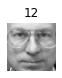

Cluster 1


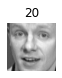

Cluster 2


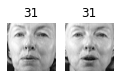

Cluster 3


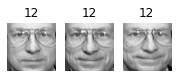

Cluster 4


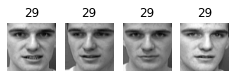

Cluster 5


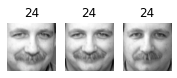

Cluster 6


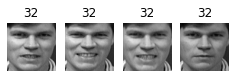

Cluster 7


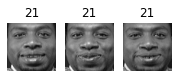

Cluster 8


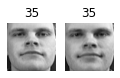

Cluster 9


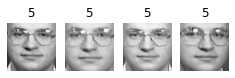

Cluster 10


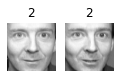

Cluster 11


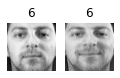

Cluster 12


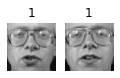

Cluster 13


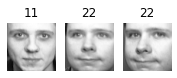

Cluster 14


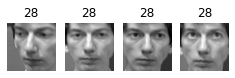

Cluster 15


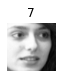

Cluster 16


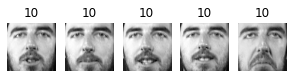

Cluster 17


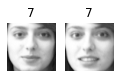

Cluster 18


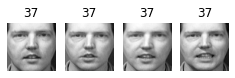

Cluster 19


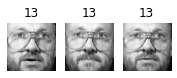

Cluster 20


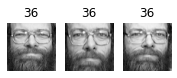

Cluster 21


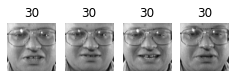

Cluster 22


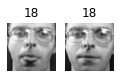

Cluster 23


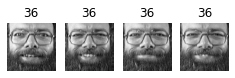

Cluster 24


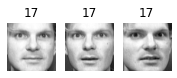

Cluster 25


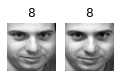

Cluster 26


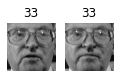

Cluster 27


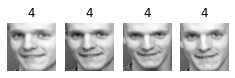

Cluster 28


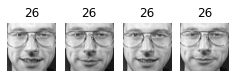

Cluster 29


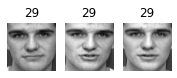

Cluster 30


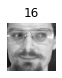

Cluster 31


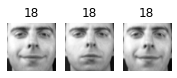

Cluster 32


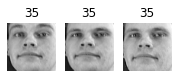

Cluster 33


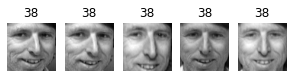

Cluster 34


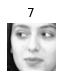

Cluster 35


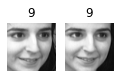

Cluster 36


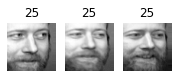

Cluster 37


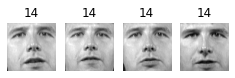

Cluster 38


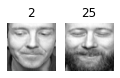

Cluster 39


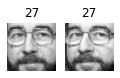

Cluster 40


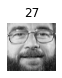

Cluster 41


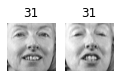

Cluster 42


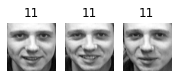

Cluster 43


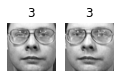

Cluster 44


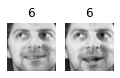

Cluster 45


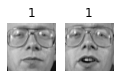

Cluster 46


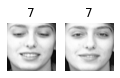

Cluster 47


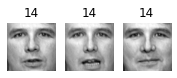

Cluster 48


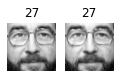

Cluster 49


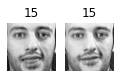

Cluster 50


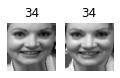

Cluster 51


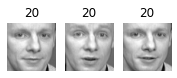

Cluster 52


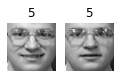

Cluster 53


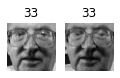

Cluster 54


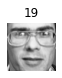

Cluster 55


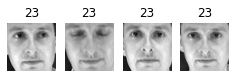

Cluster 56


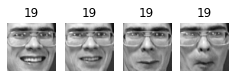

Cluster 57


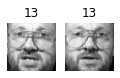

Cluster 58


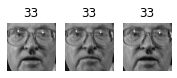

Cluster 59


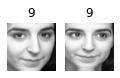

Cluster 60


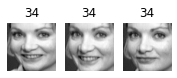

Cluster 61


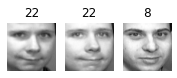

Cluster 62


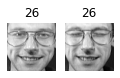

Cluster 63


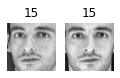

Cluster 64


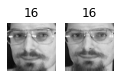

Cluster 65


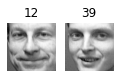

Cluster 66


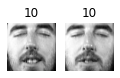

Cluster 67


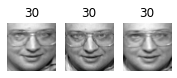

Cluster 68


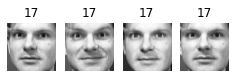

Cluster 69


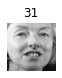

Cluster 70


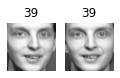

Cluster 71


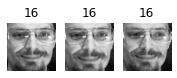

Cluster 72


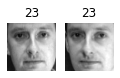

Cluster 73


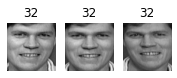

Cluster 74


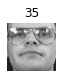

Cluster 75


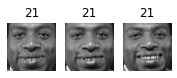

Cluster 76


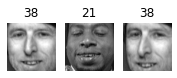

Cluster 77


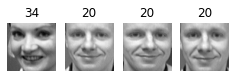

Cluster 78


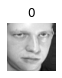

Cluster 79


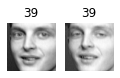

Cluster 80


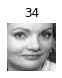

Cluster 81


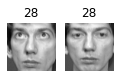

Cluster 82


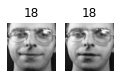

Cluster 83


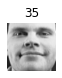

Cluster 84


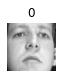

Cluster 85


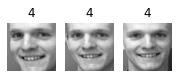

Cluster 86


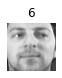

Cluster 87


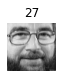

Cluster 88


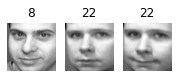

Cluster 89


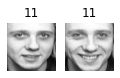

Cluster 90


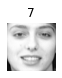

Cluster 91


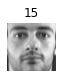

Cluster 92


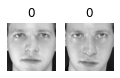

Cluster 93


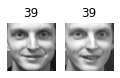

Cluster 94


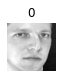

Cluster 95


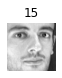

Cluster 96


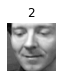

Cluster 97


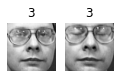

Cluster 98


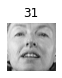

Cluster 99


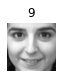

Cluster 100


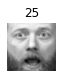

Cluster 101


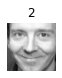

Cluster 102


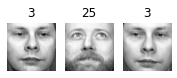

Cluster 103


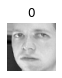

Cluster 104


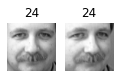

Cluster 105


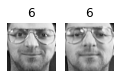

Cluster 106


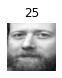

Cluster 107


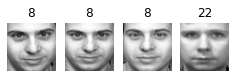

Cluster 108


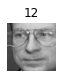

Cluster 109


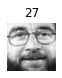

Cluster 110


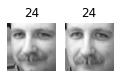

Cluster 111


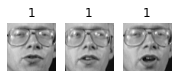

Cluster 112


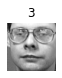

Cluster 113


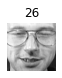

Cluster 114


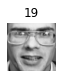

Cluster 115


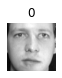

Cluster 116


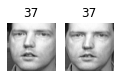

Cluster 117


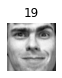

Cluster 118


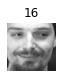

Cluster 119


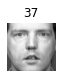

Cluster 120


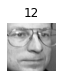

Cluster 121


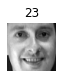

Cluster 122


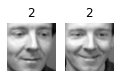

Cluster 123


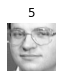

Cluster 124


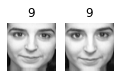

Cluster 125


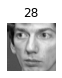

Cluster 126


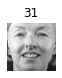

Cluster 127


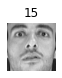

Cluster 128


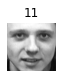

Cluster 129


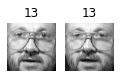

In [18]:
# Cluster and plot faces 
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. 

With Kmeans+RFC, the best validation performance seems to be with k=110 at 82.5% accuracy. With appending the featuers from the reduced set to the original featuers and again searching for the best number of clusters, the k here is 65 with validation accuracy 87.5%, which is better but still worse than just RFC which was 92.5%.

In [19]:
from sklearn.pipeline import Pipeline

# Random Forest Classifier 
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
rf_val_score = clf.score(X_valid_pca, y_valid)
print(f'RFC: {rf_val_score}')

RFC: 0.925


In [20]:
# Kmeans + Random Forest Classifier 
best_val_score, best_val_k = 0, 0
for n_clusters in ks:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    pipeline_score = pipeline.score(X_valid_pca, y_valid)
    if (best_val_score < pipeline_score):
        best_val_score = pipeline_score
        best_val_k = n_clusters

print(f'Best: {best_val_k}, {best_val_score}')

Best: 110, 0.825


In [21]:
# Append features from reduced set to original features, best k 
X_train_extended = np.c_[X_train_pca, X_train]
X_valid_extended = np.c_[X_valid_pca, X_valid]

best_val_score_extended, best_val_k_extended = 0, 0
for n_clusters in ks:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_extended, y_train)
    pipeline_score = pipeline.score(X_valid_extended, y_valid)
    if (best_val_score_extended < pipeline_score):
        best_val_score_extended = pipeline_score
        best_val_k_extended = n_clusters

print(f'Best: {best_val_k_extended}, {best_val_score_extended}')

Best: 65, 0.875
